<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/Licao1bis_RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 1bis - Regressão Linear - Métricas do ajuste

In [1]:
import matplotlib.pyplot as plt


from sklearn import datasets, linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



## 1. Exemplo: Regressão linear com dataset do SKlearn (California Housing)

Definição de [coeficiente de determinação](https://en.wikipedia.org/wiki/Coefficient_of_determination): mais próximo de 1, melhor a qualidade do ajuste.



In [2]:
X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# The coefficients
print("Coefficients: \n", regr.coef_)

y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Mean squared error: 0.56
Coefficient of determination: 0.58


In [9]:
import tensorflow as tf
from tensorflow import keras

# Define a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model (using the California Housing data from the previous example)
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
y_pred_nn = model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Mean squared error: %.2f" % mse_nn)
print("Neural Network Coefficient of determination: %.2f" % r2_nn)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1313.2216 - mse: 1313.2216
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7356 - mse: 3.7356
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9123 - mse: 1.9123
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9279 - mse: 5.9279
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6193 - mse: 1.6193
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9580 - mse: 4.9580
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.0159 - mse: 19.0159
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3847 - mse: 8.3847
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.9903 - mse: 6.9903
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.6307 - mse: 12.6307
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4115 - mse: 13.4115
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.3343 - mse: 18.3343

## 2. Exemplo: Regressão linear com dataset do SKlearn (Diabetes)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


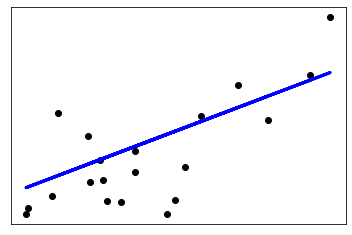

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()